# Data Cleaning/Cleansing/Wrangling

## Data cleaning will cover the following
1. Checking the columns and changing mispelled to correct names
2. checking missing values
3. checking for duplicates
4. checking for outliers

In [55]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
print(sns.get_dataset_names(), end =" ")

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic'] 

### 1. Loading the dataset and getting information

In [57]:
#Reading the file: load diabetes.csv
df = pd.read_csv("diabetes.csv")

In [58]:
# Checking top 5 rows
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [59]:
#checking the last 5 columns
df.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1008,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y


In [60]:
#checking the dataframe shape
df.shape

(1009, 14)

In [61]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [62]:
#checking the info 2
# Excludes data columns
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 14 entries, ID to CLASS
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [63]:
#concise summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1009.0,339.161546,2.397382e+02,1.0,127.0,296.0,548.0,800.00
No_Pation,1009.0,271744.776016,3.365681e+06,123.0,24065.0,34399.0,45390.0,75435657.00
AGE,1008.0,53.620040,8.740975e+00,25.0,51.0,55.0,59.0,79.00
Urea,1008.0,5.131094,2.931136e+00,0.5,3.7,4.6,5.7,38.90
Cr,1007.0,68.973188,5.981330e+01,6.0,48.0,60.0,73.0,800.00
HbA1c,1006.0,8.284155,2.533576e+00,0.9,6.5,8.0,10.2,16.00
Chol,1007.0,4.863873,1.297326e+00,0.0,4.0,4.8,5.6,10.30
TG,1007.0,2.348769,1.397487e+00,0.3,1.5,2.0,2.9,13.80
HDL,1008.0,1.204216,6.581583e-01,0.2,0.9,1.1,1.3,9.90
LDL,1007.0,2.610119,1.116095e+00,0.3,1.8,2.5,3.3,9.90


In [64]:
#Describe categorical features
df.describe(include="O").T

,count,unique,top,freq
Gender,1009,3,M,570
CLASS,1009,5,Y,840


In [65]:
#Create a dataframe copy to be used in data cleaning using 
# copy() method
# deep = True: makes a complete copy of the DataFrame
df1 = df.copy(deep = True)
df1.sample(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
53,640,34261,F,47.0,3.3,53.0,5.4,4.1,0.7,1.7,2.8,0.7,20.0,N
725,412,10969,M,55.0,3.8,50.0,9.6,5.7,4.5,1.0,3.0,2.1,32.0,Y
633,170,24028,M,54.0,4.3,63.0,12.1,3.6,5.1,0.9,2.5,0.9,30.0,Y
806,770,34555,M,54.0,10.4,126.0,10.0,4.4,1.3,1.4,1.0,2.0,37.0,Y
862,22,51625,M,51.0,3.5,72.0,7.0,5.4,1.5,1.0,3.7,0.7,27.0,Y


In [66]:
#check unique value for one column (Gender)
print(df1['Gender'].unique())
#  Counts the unique values in the column
print(df1['Gender'].value_counts())

['F' 'M' 'f']
M    570
F    437
f      2
Name: Gender, dtype: int64


In [67]:
# Replaces "f" with "F"
df1["Gender"] = df1["Gender"].replace('f',"F")
# Checks unique values in Gender Column
print(df1['Gender'].unique())
#  Counts the unique values in the column
print(df1['Gender'].value_counts())

['F' 'M']
M    570
F    439
Name: Gender, dtype: int64


In [68]:
# check for unique values in each column at once using for loop
for coln in df1:
    coln_value = df1[coln].unique()
    print(f"{coln}\n {coln_value}\n")

ID
 [502 735 420 680 504 634 721 421 670 759 636 788  82 132 402 566 596 676
 729 742  64  97 126 390 458 470 494 564 696 106 138 315 650 678 699 703
 708 719 740 741 746 794 219 255 450 626 664 704 799 210 237 318 620 640
 668 701 174 276 345 482 630 789 348   7   9  10  42  47  71  72  83  88
  89  96  98  99 102 134 137 139 141 143 144 145 147 149 150 153 154 157
 161 165 166 171 180 181 182 186 190 197 435 472  85 710 429 702   4 189
 201 285 393 468 492 496 498 684 700 716 366 399 490 500 672 690 718 264
 464 466 686 688  16 705 709  19 123 476 682 706 754  68 342 712 715  12
  20  41  60  79  81 133 135 146 152 178  18  24 675  39 474 648  48 656
  57 658  69 662 714  87 231 505 654  61 127 228 674 744  58 108 198 357
 588 666 698 753 110 113 119 122 452 652 660 673 162 168 580 694 790 140
 375 426 453 534 612 692 717 725 777  67 109 351 552 685 750  31 129 173
 176 179 183 185 195 316 646 187 188 191 194 200 203 411 520 622 758 206
 600  76  86 209 212 215 218 221 224 227 438 45

### 2. Data Cleaning


#### 2.1. Checking the colunms and dealing with mispelled columns

In [69]:
#check the colunms use columns attribute
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [70]:
#changing no_pation column, use rename method 
#df.rename(columns = {'old col name': 'new coln name'}, inplace = True)
#inplace = True: replaces the column_name permanently
df1.rename(columns = {"No_Pation": "Patient No"}, inplace = True)
df1.columns

Index(['ID', 'Patient No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [71]:
#Change columns name to lower case for unifromity
# use .lower(): df.columns = df.columns.str.lower()
df1.columns = df1.columns.str.lower()
df1.columns

Index(['id', 'patient no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol',
       'tg', 'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

In [72]:
#Removing the white space if any, 
#use .replace() e.g df.columns = df.columns.str.replace(' ', '')
df1.columns = df1.columns.str.replace(" ", "_")
df1.columns

Index(['id', 'patient_no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol',
       'tg', 'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

In [73]:
#we can combine the 2 argument into one code
#df1.columns = df1.columns.str.lower().replace(' ', '_')
# Method chaining
df1.columns = df1.columns.str.lower().str.replace(" ", "_")
df1.columns

Index(['id', 'patient_no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol',
       'tg', 'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

In [74]:
#Drop unnessary columns
#a. del df['col name'] # you can also used drop method: 
#Syntax: df.drop(columns = 'col_name', axis=1, inplace=True)

#Deleting a single column
#del df1['id']
df1.columns

Index(['id', 'patient_no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol',
       'tg', 'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

In [75]:
# Dropping multiple unnecessary columns
#Syntax: df.drop(columns = 'col_name', axis=1, inplace=True)
df1.drop(columns = 'id', axis = 1, inplace = True)
df1.columns

Index(['patient_no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol', 'tg',
       'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

### 2.2 Checking the missing values and dealing with them

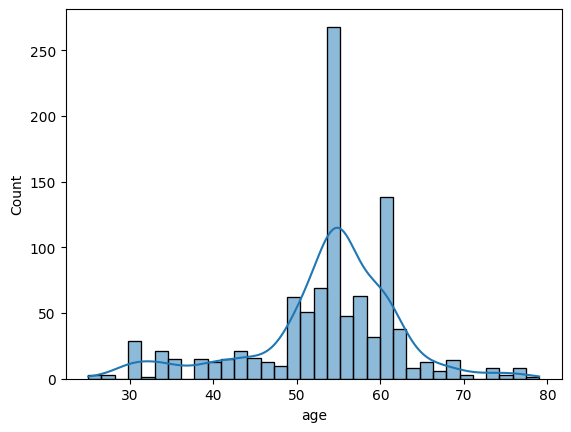

In [76]:
#Histogram

sns.histplot(df1.age, kde = True);
#kde= True: Shows the trendline

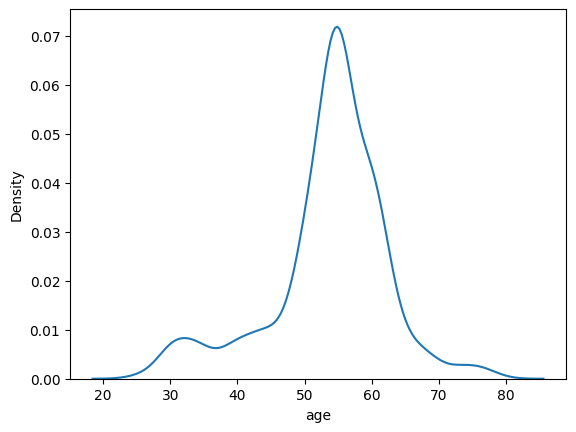

In [77]:
#KDE Plot
sns.kdeplot(df1.age);

In [78]:
# Check if the dataframe has any null values
df1.isna().any()

patient_no    False
gender        False
age            True
urea           True
cr             True
hba1c          True
chol           True
tg             True
hdl            True
ldl            True
vldl           True
bmi           False
class         False
dtype: bool

In [79]:
#check the missing values, you can either use isna or isnull()
df1.isnull().sum()

# Alt: df1.isna().sum()

patient_no    0
gender        0
age           1
urea          1
cr            2
hba1c         3
chol          2
tg            2
hdl           1
ldl           2
vldl          1
bmi           0
class         0
dtype: int64

In [80]:
# To get the total null values
print(f"Our dataframe has a total of {df1.isna().sum().sum()} null values")

Our dataframe has a total of 15 null values


In [81]:
#a. imputing "age" variable using the mean
#Get the mean  e.g mean_values = df.coln.mean()
age_mean = df1.age.mean()
print(age_mean)
#fill up the missing value, use fillna e.g df['col'].fillna(mean_values, inplace=True)
df1['age'].fillna(age_mean, inplace = True)
df1['age'].isna().any() 
# Age now has no null values

53.620039682539684


False

0.6158995174505535


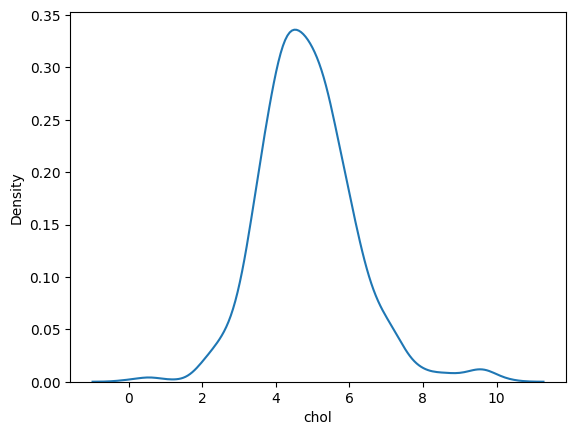

In [82]:
# Checking skewness for columns
print(df1['chol'].skew())
sns.kdeplot(df1.chol);

In [83]:
#c Imputing using the median" replace mean with median
df1['chol'].fillna(df1['chol'].median(), inplace = True)
print(f'We now have {df1["chol"].isna().sum()} null values')
df1.isna().sum()

We now have 0 null values


patient_no    0
gender        0
age           0
urea          1
cr            2
hba1c         3
chol          0
tg            2
hdl           1
ldl           2
vldl          1
bmi           0
class         0
dtype: int64

In [84]:
#d. how to impute using the mode
#coln_mode = df.colname.mode()[0]

# Mode is preferred for categorical values NOT numerical
gender_mode = df1.gender.mode()[0]
gender_mode

# impute with the mode
#df['col'].fillna(col_mode, inplace=True) # use bfill for backword fill, and ffill for forward fill

'M'

Observations:

The mode of a dataset can have multiple values. When we call `mode()` on a Pandas dataframe, it returns a Series object containing all the modal values. To access the first modal value, we use the `[0]` index.

For example, if the mode of the `gender` column in the `df1` dataframe is both `'Female'` and `'Male'`, then `df1.gender.mode()` will return a Series object containing both values. To access the first modal value, which is `'Female'`, we use `df1.gender.mode()[0]`.

Using `[0]` ensures that we are only using the first modal value for imputation, rather than all the modal values. This is important because using multiple values for imputation can introduce bias into the data.

In [85]:
#e. Fill missing values with specific values e.g 0
#df['col'].fillna(0, inplace=True)
df1['urea'].fillna(3.2, inplace = True)
df1.isna().sum()

patient_no    0
gender        0
age           0
urea          0
cr            2
hba1c         3
chol          0
tg            2
hdl           1
ldl           2
vldl          1
bmi           0
class         0
dtype: int64

In [86]:
#f.Fill missing values in the categorical columns with specific values
#df['col'].fillna('N/A', inplace=True)


In [87]:
#dropping the missing values# we drop when we just have few missing values using dropna
df1.dropna(inplace = True)

In [88]:
#check the null values using isna()
print("And Wala! No null values")
df1.isna().sum()

And Wala! No null values


patient_no    0
gender        0
age           0
urea          0
cr            0
hba1c         0
chol          0
tg            0
hdl           0
ldl           0
vldl          0
bmi           0
class         0
dtype: int64

In [124]:
#Replacing values in the class column
#df1.groupby('class')['class'].count()
df1.shape

(995, 13)

In [90]:
#check unique in class variable
df1['class'].unique()
df1['class'].value_counts()

Y     833
N     102
P      53
Y       9
N       1
Name: class, dtype: int64

In [91]:
#replace values in class, and gender coln df['coln'] = df['coln'].str.replace('N ','N')
df1['class'] = df1['class'].replace("N ", "N")
df1['class'] = df1['class'].replace("Y ", "Y")
df1['class'].value_counts()

Y    842
N    103
P     53
Name: class, dtype: int64

In [92]:
#check unique again
df1['class'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [93]:
#check count again  df.groupby('class')['class'].count()

In [94]:
#do the same for gender
# Already done above

In [95]:
#replace values in gender


### 2.3 Checking for duplicate


In [108]:
#check duplicates use duplicated()
df1.duplicated().sum()

0

In [97]:
#drop the duplicates
df1.drop_duplicates(inplace = True)

#checking on whether duplicates were dropped
df1.duplicated().sum()

0

### 2.4 Checking for outliers


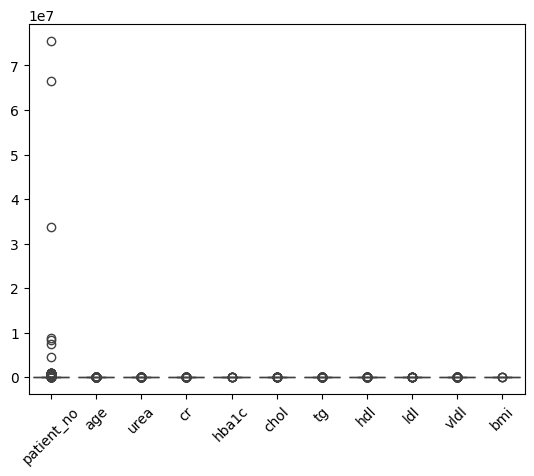

In [109]:
#checking for outlier, use boxplot on all numerical series
plt.xticks(rotation = 45)
sns.boxplot(df1);

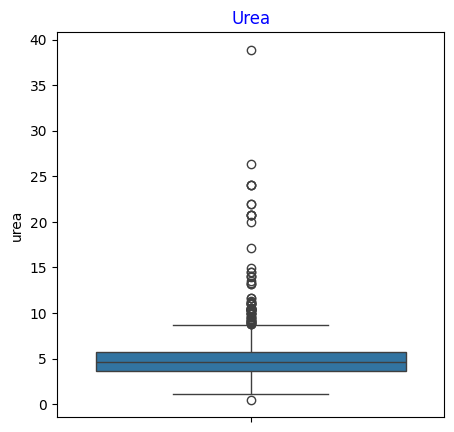

In [115]:
# check outlier for urea
plt.figure(figsize = (5,5))
sns.boxplot(df1['urea'])
plt.title("Urea", color = "b");

In [100]:
#Remove the outlier using the maximum quantile in urea column

#a. Get the max interquantile at 0.995
quantile25 = df1['urea'].quantile(0.25) #25% of 
print(quantile25)
quantile995 = df1['urea'].quantile(0.995) # 99.5
print(quantile995)

3.66
22.059999999999945


In [101]:
#check the values under outliers
#df[df["cr"] > max_cr]
df_urea_outliers = df1[df1["urea"] > quantile995]
df_urea_outliers

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
589,7747,F,61.0,24.0,401.0,7.0,4.3,2.9,0.4,2.7,1.3,30.0,Y
590,34455,F,55.0,24.0,401.0,6.3,4.3,2.9,0.4,2.7,1.3,28.0,Y
592,2570,F,61.0,24.0,401.0,7.0,4.3,2.9,0.4,2.7,1.3,36.6,Y
884,9963,M,51.0,38.9,58.0,6.8,5.9,2.6,1.4,3.4,1.2,33.0,Y
892,2345,M,55.0,26.4,228.0,7.1,4.1,1.9,1.3,2.0,0.9,27.0,Y


In [102]:
#Remove the outlier by assigning the value to a new DataFrame
#dfnew = df[df["cr"] < max_cr]
df2 = df1[df1['urea'] < quantile995]
df2

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,87654,M,30.0,7.1,81.0,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,24004,M,38.0,5.8,59.0,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
1000,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
1004,454316,M,55.0,3.2,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y


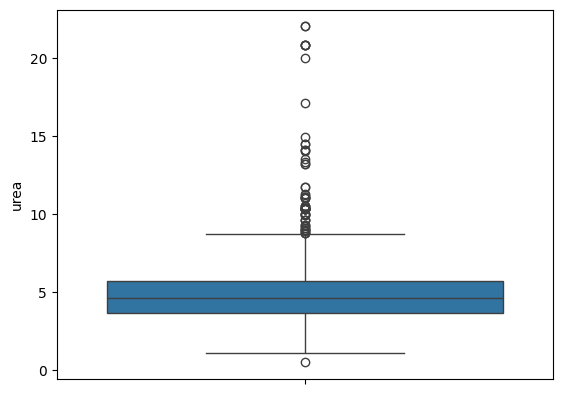

In [103]:
#confirm removal of outlier
sns.boxplot(df2['urea']);

The outliers have been removed

In [104]:
#b. similary we can use iqr to remove the outliers

# Calculate the interquartile range (IQR)
q1 = df2['cr'].quantile(0.25)
q3 = df2['cr'].quantile(0.75)
iqr = q3 - q1


# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * (q3 - q1)
upper_bound = q3 + 1.5 * iqr

# Filter the data to remove outliers
df3 = df2[(df2['cr'] >= lower_bound) & (df2['cr'] <= upper_bound)]
df3
# Check the boxplot again


,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,87654,M,30.0,7.1,81.0,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,24004,M,38.0,5.8,59.0,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
1000,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
1004,454316,M,55.0,3.2,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y


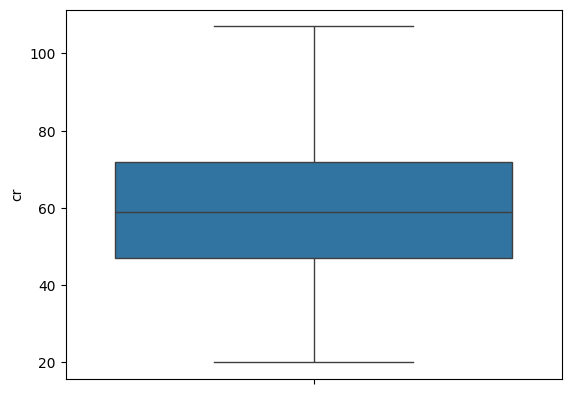

In [105]:
sns.boxplot(df3['cr']);

In [106]:
# Creating an extra col

df3['nonsense'] = df3['urea'] * 15
df3

C:\Users\nrmmw\AppData\Local\Temp\ipykernel_12984\2844537757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['nonsense'] = df3['urea'] * 15


,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class,nonsense
0,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,70.5
1,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,67.5
2,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,70.5
3,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,70.5
4,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,106.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,87654,M,30.0,7.1,81.0,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,106.5
998,24004,M,38.0,5.8,59.0,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,87.0
1000,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y,132.0
1004,454316,M,55.0,3.2,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y,48.0
